<a href="https://colab.research.google.com/github/Rishav273/Ineuron-Assignments/blob/main/Stats_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

In [ ]:
import numpy as np
from scipy import stats, integrate,special
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def get_descriptive_stats(input):

  print(f"The mean of the marks: {np.mean(marks)}")
  print(f"The median of the marks: {np.median(marks)}")
  print(f"The mode of the marks: {stats.mode(marks)}")
  print(f"The standard Deviation of the marks: {np.std(marks)}")

marks = np.asarray([6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8])
get_descriptive_stats(marks)

The mean of the marks: 6.85
The median of the marks: 7.0
The mode of the marks: ModeResult(mode=array([7]), count=array([5]))
The standard Deviation of the marks: 1.5898113095584647


Question 2:

In [ ]:
records =np.asarray([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 
                          70, 40, 145, 113, 90, 68, 174, 194, 170,100, 
                          75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123,
                          100, 89, 120, 109])

get_descriptive_stats(records)

The mean of the marks: 6.85
The median of the marks: 7.0
The mode of the marks: ModeResult(mode=array([7]), count=array([5]))
The standard Deviation of the marks: 1.5898113095584647


Question 3:

In [ ]:
x = np.array([0,1,2,3,4,5])
fx = np.array([0.09,0.15,0.40,0.25,0.10,0.01])

x.reshape((1,-1))
fx.reshape((-1,1))
mean=np.dot(x,fx)
x_var = (x-mean)**2
variance = np.dot(x_var.reshape(1,-1),fx)
print(f"Mean workout: {mean}")
print(f"Variance of workout: {str(variance)}")

Mean workout: 2.15
Variance of workout: [1.2275]


Question 4:

In [ ]:
pdf =lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(pdf,12.6,np.inf)
y = 11
cdf=integrate.quad(pdf,-np.inf,y)
print(f"Proportion of Parts need to scrapped when d >12.6mm is :{P_x[0]}")
print(f"CDF when d= 11mm is:{cdf[0]}")
print(f"Proportion of CDF when d>12.5mm is : {integrate.quad(pdf,12.5,np.inf)[0]}")

Proportion of Parts need to scrapped when d >12.6mm is :0.13533528323661398
CDF when d= 11mm is:inf
Proportion of CDF when d>12.5mm is : 1.0000000000000024


Question 5:

In [ ]:
n = 6
k = 2
p = 0.3

binom_prob = stats.binom.pmf(k=k,n=n,p=p)
print('Probability of having 2 faulty LEDs: ',binom_prob)

Probability of having 2 faulty LEDs:  0.32413499999999995


a      2.000000
B_a    0.324135
Name: 2, dtype: float64


Text(0, 0.5, 'Probability of Fault')

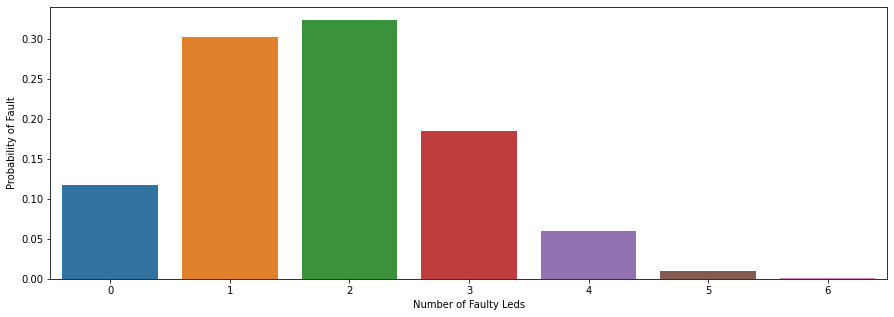

In [ ]:
#x = faulty = 0.3
#y = not faulty = 0.7
x = 0.3
y = 0.7
df=pd.DataFrame({'a':[int(i) for i in range(7)],
                 'B_a':[special.comb(6,i)*(x**i)*(y**(6-i)) for i in range(7)]})
print(df.iloc[2])
plt.figure(figsize=(15,5))
sns.barplot('a','B_a',data=df)
plt.xlabel('Number of Faulty Leds')
plt.ylabel('Probability of Fault')

In [ ]:

df['Expected value']=df['a']*df['B_a']
mean=np.round(df['Expected value'].sum())
print('mean = {}'.format(mean))
df['variance']=df['B_a']*(df['a']-mean)**2
std=np.sqrt(df['variance'].sum())
print(f"Standard Deviation : {np.round(std)}")


mean = 2.0
Standard Deviation : 1.0


Question 6:

In [ ]:
#Gaurav- avg=8,p1=0.75
#Barakha- avg=12,p2=0.45

print(f"Probability of each of them solving 5 questions correctly is:{stats.binom.pmf(5,8,0.75)*stats.binom.pmf(5,12,0.45)}")
print(f"Probability of each of them solving 4 questions correctly is:{stats.binom.pmf(4,8,0.75)*stats.binom.pmf(4,12,0.45)}")
print(f"Probability of each of them solving 6 questions correctly is:{stats.binom.pmf(6,8,0.75)*stats.binom.pmf(6,12,0.45)}")

Probability of each of them solving 5 questions correctly is:0.04619989057299217
Probability of each of them solving 4 questions correctly is:0.014704826281912994
Probability of each of them solving 6 questions correctly is:0.0661498433204205


Question 7:

In [ ]:
#We need to calculate average number of customers arriving per 4 minutes
#72/60 customers come per minute
mu = (72/60)*4 #customers come per 4 minutes

print(f"The probability of arriving 5 cutomers in 4 minutes is : {stats.poisson.pmf(k=5,mu=mu)}")

# For not more than 3 customers, we need to consider 0,1,2 and 3 customers separately:
print(f"The probability of not more than 3 cutomers arriving in 4 minutes is : {stats.poisson.cdf(k=3,mu=mu)}")
print(f"The probability of more than 3 cutomers arriving in 4 minutes is : {1 - stats.poisson.cdf(k=3,mu=mu)}")

The probability of arriving 5 cutomers in 4 minutes is : 0.17474768364388296
The probability of not more than 3 cutomers arriving in 4 minutes is : 0.2942299164965642
The probability of more than 3 cutomers arriving in 4 minutes is : 0.7057700835034357


Text(0, 0.5, 'Probability')

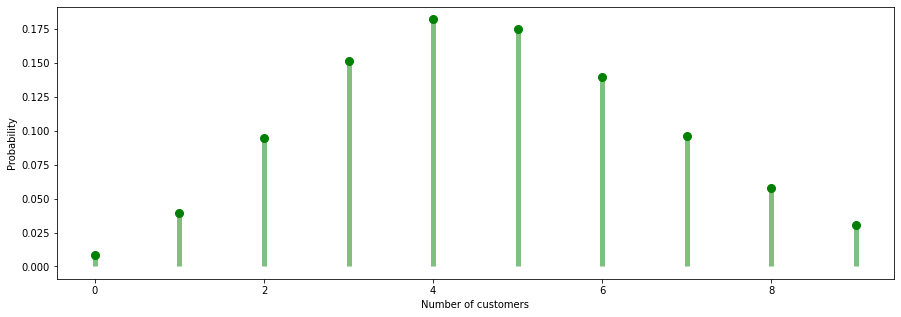

In [ ]:
x = list(range(0,10))
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x, stats.poisson.pmf(x,mu), 'go', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='g', lw=5, alpha=0.5)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

Question 8:

The pobability of commiting 2 errors in 455 words financial report is :0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is :0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is :0.039377135392854104


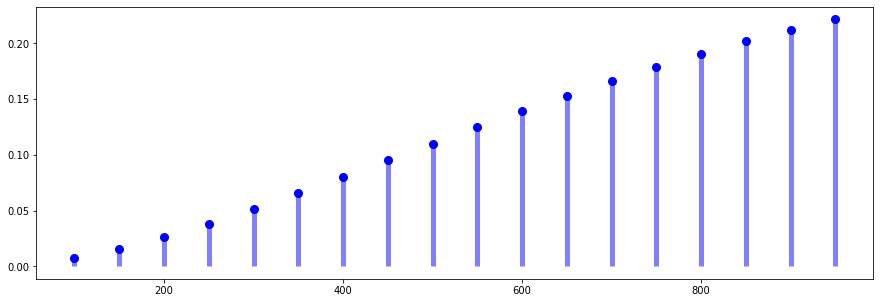

In [ ]:
#Rate of entering=77 per minute
#error rate= 6/hour=0.1 per minute
#No of errors per word=0.1/77
unit_mu=0.1/77
def mu(n):
    return n * unit_mu
print(f"The pobability of commiting 2 errors in 455 words financial report is :{stats.poisson.pmf(2,mu=mu(455))}")
print(f"The pobability of commiting 2 errors in 1000 words financial report is :{stats.poisson.pmf(2,mu=mu(1000))}")
print(f"The pobability of commiting 2 errors in 255 words financial report is :{stats.poisson.pmf(2,mu=mu(255))}")
x=range(100,1000,50)
mu=[i*unit_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,stats.poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, stats.poisson.pmf(2,mu), colors='b', lw=5, alpha=0.5)
#As the number of words increase probability of getting errors increases

Question 10:

In [ ]:
from scipy.stats import norm
def P(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]

print('P(Z>1.26) = %.5f'%(1-P(1.26)))
print('P(Z<-0.86) = %.5f'%P(-0.86))
print('P(Z>-1.37) = %.5f'%(1-P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.5f'%P(0.37,b=-1.25))
print('P(Z ≤ −4.6) = %.5f'%P(-4.6))

P(Z>1.26) = 0.10383
P(Z<-0.86) = 0.19489
P(Z>-1.37) = 0.91466
P(−1.25 < Z < 0.37) = 0.53866
P(Z ≤ −4.6) = 0.00000


In [ ]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


Question 11:

In [ ]:
mean = 10
std = np.sqrt(4)

def I(z, b=-np.inf):
    z = (z-mean)/std
    return integrate.quad(norm.pdf,b,z)[0]
print(f"Probability that current > 13mA is: {1-I(13)}")
print(f"Probability that current is between 9 mA and 11 mA is : {1-I(11,b=9)}")

Probability that current > 13mA is: 0.06680720126885797
Probability that current is between 9 mA and 11 mA is : 1.3085375387259144


Question 12:

In [ ]:
mean_diameter=0.2508
std_diameter=0.0005
#specified dia in the range of 0.2485<d<0.2515
#case-1 if mean_dia=0.2508
def I(mean,std,a,b) :
  #gives P(Z<=x)
  a=(a-mean)/std
  b=(b-mean)/std
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2508,I(0.2508,0.0005,0.2485,0.2515)}")
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2500,I(0.2500,0.0005,0.2485,0.2515)}")

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.2508, None)
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.25, None)
